# Linear Regression

### Generic Package Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

C:\Users\sunde\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Get Linear Regression Module from Scikit

User Guide: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [2]:
from sklearn.linear_model import LinearRegression

### Load BMI Data

In [3]:
df = pd.read_csv('bmi_and_life_expectancy.csv')
df = df.set_index('Country')
df.head()

,Life expectancy,BMI
Country,,
Afghanistan,52.8,20.62058
Albania,76.8,26.44657
Algeria,75.5,24.59620
Andorra,84.6,27.63048
Angola,56.7,22.25083


In [4]:
df.describe()

,Life expectancy,BMI
count,163.000000,163.000000
mean,69.666933,24.792378
std,8.981933,2.427900
min,44.500000,19.866920
25%,63.450000,22.527940
50%,71.800000,25.320540
75%,76.500000,26.603960
max,84.600000,30.995630


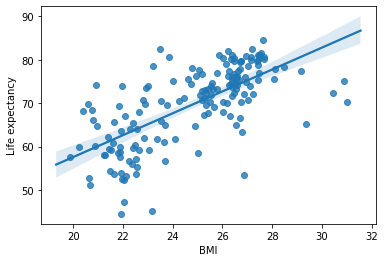

In [5]:
sns.regplot(x='BMI',y='Life expectancy',data=df)

### Errr...that data doesn't look right. I fully expected life expectancy to reduce with increasing BMI.

In [6]:
y_life_expentancy = df['Life expectancy'].to_numpy()
x_BMI = df['BMI'].to_numpy()

In [7]:
y_life_expentancy.shape

(163,)

In [8]:
x_BMI.shape

(163,)

In [9]:
y_life_expentancy = y_life_expentancy.reshape(-1, 1)
x_BMI = x_BMI.reshape(-1, 1)

### Fit Data to Model

In [10]:
model = LinearRegression()
model.fit(x_BMI,y_life_expentancy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Excel Graph

![excel graph](excel_graph.png)

In [11]:
slope = model.coef_
slope

array([[2.51847944]])

In [12]:
intercept = model.predict([[0]])
intercept[0][0]

7.227838343304796

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
life_expectancy_prediction = model.predict(x_BMI)

In [15]:
mean_squared_error(y_life_expentancy, life_expectancy_prediction)

43.02103118924391

In [16]:
r2_score(y_life_expentancy, life_expectancy_prediction)

0.4634455864661575

### Predict using Model

In [17]:
your_BMI = 20
your_life_expectancy = model.predict([[your_BMI]])
print(f"Your life expectancy is {int(your_life_expectancy[0][0])}")

Your life expectancy is 57


In [18]:
your_BMI = 30
your_life_expectancy = model.predict([[your_BMI]])
print(f"Your life expectancy is {int(your_life_expectancy[0][0])}")

Your life expectancy is 82
